<a href="https://colab.research.google.com/github/AlineFiori/MVP-Machine_Learning/blob/main/Template_Machine_Learning_Pregnancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning
**Nome:** Aline Fiori Gonçalves

**Matrícula:** 4052025000106

**Dataset:** [Pregnancy](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data?resource=download)

# 1. Descrição do Problema

O conjunto de dados 'Pregnancy' foi compilado com o objetivo de identificar características de saúde em mulheres gestantes que possam indicar risco à gestação. Nele, é possível analisar aspectos cruciais como idade gestacional, pressão arterial, glicemia, frequência cardíaca e a classificação de risco gestacional associada, entre outros.

## 1.1 Hipóteses do Problema

Em relação a idade gestacional 35+ (gestante com 35 anos ou mais):

- Qual o percentual deste grupo de risco na amostra avaliada?

- Qual o percentual de gestação de alto risco?

- Qual a correlação entre a idade materna e o risco gestacional?

## 1.2 Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (idade gestacional, pressáo arterial, glicemia e frequencia cardiaca), o objetivo é prever a qual o risco gestacional.

## 1.3 Atributos do Dataset

O dataset Pregnancy contém, originalmente, 1.014 amostras, 07 colunas, e 03 classificações diferentes de risco gestacional.

Possui cinco atributos:

- ***Age*** (idade em anos da gestante)
- ***SystolicBP*** (valor máximo da pressão arterial em mmHg)
- ***DiastolicBP*** (valor mínimo da pressão arterial em mmHg)
- ***BS (Blood Glicose)*** (níveis de glicose no sangue em termos de concentração molar, mmol/L)
- ***BodyTemp*** (temperatura corporal em Fahrenheit)
- ***HeartRate*** (frequência cardíaca normal em repouso, em batimentos por minuto)
- ***Risk Level*** (nível de intensidade de risco previsto durante a gravidez)

## 1.4 Seleção de Dados

Serão adicionadas duas colunas ao Dataset com a finalidade de refinar a análise dos dados, são elas:
- Idade_35+: classificação da idade gestacional em 1 (>=35) ou 0 (<35)
- Nivel_Risco_Numerico: classificação do nível de risco em 2 (right risk), 1 (mid risk) e 0 (low risk).

# 2. Importação das Bibliotecas
Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização, pré-processamento dos dados e machine learning.

In [156]:
# ==============================================================================
# 1. CONFIGURAÇÃO E BIBLIOTECAS GERAIS
# ==============================================================================

# Ignora warnings para uma saída mais limpa
import warnings
warnings.filterwarnings("ignore")

# Importa bibliotecas para manipulação e visualização de dados
import pandas as pd # Para trabalhar com DataFrames, ideal para dados tabulares
import numpy as np # Para operações numéricas e arrays multidimensionais
import matplotlib.pyplot as plt # Para criar gráficos estáticos
import seaborn as sns # Para criar gráficos estatísticos atraentes e informativos

# ==============================================================================
# 2. FERRAMENTAS DO SCIKIT-LEARN PARA PRÉ-PROCESSAMENTO E MODELAGEM
# ==============================================================================

# Módulo de pré-processamento
from sklearn.preprocessing import StandardScaler # Padroniza features, essencial para modelos como SVM e RNA
from sklearn.pipeline import Pipeline # Permite encadear etapas de processamento e modelagem

# Módulo para seleção e avaliação de modelos
from sklearn.model_selection import (
    train_test_split,    # Divide o dataset em treino e teste
    KFold,               # Implementa validação cruzada k-fold
    cross_val_score,     # Avalia o desempenho do modelo com validação cruzada
    GridSearchCV,        # Otimiza hiperparâmetros buscando a melhor combinação em uma grade
)

# Módulo de métricas de avaliação
from sklearn.metrics import (
    accuracy_score,      # Calcula a acurácia de um modelo
    classification_report, # Gera um relatório detalhado de métricas de classificação
    confusion_matrix,    # Cria a matriz de confusão para analisar erros
)

# ==============================================================================
# 3. ALGORITMOS DE MACHINE LEARNING
# ==============================================================================

# Modelos de Machine Learning
from sklearn.tree import DecisionTreeClassifier # Árvore de Decisão
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors (KNN)
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.svm import SVC # Support Vector Machine (SVM)
from sklearn.neural_network import MLPClassifier # Rede Neural (RNA)
from sklearn.ensemble import (
    RandomForestClassifier,  # Modelo de ensemble que combina várias árvores de decisão
    VotingClassifier         # Combina as previsões de múltiplos modelos para um resultado final
)

# Modelo XGBoost (Gradient Boosting)
from xgboost import XGBClassifier # Otimização de modelos baseados em árvore

# ==============================================================================
# 4. FERRAMENTAS ADICIONAIS
# ==============================================================================

# Utilidades para salvar e carregar modelos
import joblib # Eficiente para salvar modelos treinados


from sklearn.preprocessing import MinMaxScaler





# Módulo para seleção e avaliação de modelos
from sklearn.model_selection import (
    train_test_split,    # Divide o dataset em treino e teste
    KFold,               # Implementa validação cruzada k-fold
    cross_val_score,     # Avalia o desempenho do modelo com validação cruzada
    GridSearchCV,        # Otimiza hiperparâmetros buscando a melhor combinação em uma grade
    RandomizedSearchCV   # Otimiza hiperparâmetros buscando combinações aleatórias
)

# 3. Importação do Dataset

Esta seção consolida todas as etapas de carregamento inicial do dataset Pregnancy.

In [157]:
# 1. Link do GitHub em que o dataset 'Pregnancy' está salvo
url_github = 'https://github.com/AlineFiori/MVP/raw/refs/heads/main/Maternal%20Health%20Risk%20Data%20Set.csv.xls'

In [158]:
# 2. Carregar os dados da url para um data frame pandas
Dataset = pd.read_csv(url_github)

In [159]:
# 3. Primeiras linhas
Dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# 4. Análise Exploratória de Dados

O objetivo desta etapa é entender a estrutura do dataset, identificar padrões, entender as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## 4.1 Estrutura do Dataset

Etapa de configuracão e adequação dos dados, crucial para os próximos passos de analise de dados e Machine Learning. Tem por objetivo verificar:

- Qualidade do Modelo: Modelos de Machine Learning são tão bons quanto os dados com os quais são treinados. Dados mal configurados, com erros, inconsistências ou em formatos inadequados, levarão a modelos com desempenho ruim, previsões imprecisas e decisões erradas.
- Interpretabilidade: Dados bem estruturados e limpos facilitam a compreensão dos padrões e a interpretação dos resultados da análise.
- Eficiência: Trabalhar com dados limpos e adequados torna o processo de desenvolvimento e teste muito mais eficiente, economizando tempo e recursos.
- Consistência: Garante que os dados estejam em um formato consistente para que as ferramentas e algoritmos possam processá-los corretamente.

In [160]:
# 1. Renomear colunas para facilitar o uso
colunas_para_renomear = {
    'Age': 'Idade',
    'SystolicBP': 'Pressao_Sistolica',
    'DiastolicBP': 'Pressao_Diastolica',
    'BS': 'Nivel_Glicose',
    'BodyTemp': 'Temperatura_Corporal',
    'HeartRate': 'Frequencia_Cardiaca',
    'RiskLevel': 'Nivel_Risco'}


Dataset = Dataset.rename(columns=colunas_para_renomear)

print("\nBase com colunas renomeadas - Primeiras 5 linhas:")
print(Dataset.head())


Base com colunas renomeadas - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  
0                  98.0                   86   high risk  
1                  98.0                   70   high risk  
2                 100.0                   80   high risk  
3                  98.0                   70   high risk  
4                  98.0                   76    low risk  


In [161]:
# 2. Criar nova coluna 'Idade_35+' para classificar a idade gestacional
# np.where(condição, valor_se_verdadeiro, valor_se_falso)
Dataset['Idade_35+'] = np.where(Dataset['Idade'] >= 35, 1, 0) # 1 para >=35 anos, 0 para <35 anos

print("\nBase com nova coluna - Primeiras 5 linhas:")
print(Dataset.head())


Base com nova coluna - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  Idade_35+  
0                  98.0                   86   high risk          0  
1                  98.0                   70   high risk          1  
2                 100.0                   80   high risk          0  
3                  98.0                   70   high risk          0  
4                  98.0                   76    low risk          1  


In [162]:
# 3. Verificar todos os valores distintos (sem duplicatas) da coluna Nivel_Risco para classificá-los na sequencia
print("\n--- Valores únicos na coluna 'Nivel_Risco': ---")
print(Dataset['Nivel_Risco'].unique())


--- Valores únicos na coluna 'Nivel_Risco': ---
['high risk' 'low risk' 'mid risk']


In [163]:
# 4. Criar nova coluna 'Nivel_Risco_Numerico' para classificar o nível de risco

def mapear_nivel_risco_para_numerico(row):
    if row['Nivel_Risco'] == 'high risk':
        return 2
    elif row['Nivel_Risco'] == 'mid risk':
        return 1
    elif row['Nivel_Risco'] == 'low risk': # Correção da sintaxe aqui
        return 0
    else: # Para qualquer outro valor inesperado
        return np.nan # Retorna Not a Number para valores não mapeados

# Aplicar a função ao DataFrame e atribuir à nova coluna 'Nivel_Risco_Numerico'
Dataset['Nivel_Risco_Numerico'] = Dataset.apply(mapear_nivel_risco_para_numerico, axis=1)

print("\nBase com nova coluna - Primeiras 5 linhas:")
print(Dataset.head())


Base com nova coluna - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  Idade_35+  \
0                  98.0                   86   high risk          0   
1                  98.0                   70   high risk          1   
2                 100.0                   80   high risk          0   
3                  98.0                   70   high risk          0   
4                  98.0                   76    low risk          1   

   Nivel_Risco_Numerico  
0                     2  
1                     2  
2                     2  
3                     2  
4 

In [164]:
# 5. Verificar todos os valores distintos (sem duplicatas) da coluna Nivel_Risco_Numerico para checar o resultado da classificação
print("\n--- Valores únicos na coluna 'Nivel_Risco': ---")
print(Dataset['Nivel_Risco_Numerico'].unique())


--- Valores únicos na coluna 'Nivel_Risco': ---
[2 0 1]


In [165]:
# 6. Visão geral: total de linhas e colunas
print(f"Total de instâncias (linhas): {len(Dataset)}")
print(f"Total de colunas: {len(Dataset.columns)}")

Total de instâncias (linhas): 1014
Total de colunas: 9


In [166]:
# 7. Análise de tipos de dados e valores nao nulos
print("\nInformações sobre os tipos de dados e valores não nulos")
Dataset.info()


Informações sobre os tipos de dados e valores não nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Idade                 1014 non-null   int64  
 1   Pressao_Sistolica     1014 non-null   int64  
 2   Pressao_Diastolica    1014 non-null   int64  
 3   Nivel_Glicose         1014 non-null   float64
 4   Temperatura_Corporal  1014 non-null   float64
 5   Frequencia_Cardiaca   1014 non-null   int64  
 6   Nivel_Risco           1014 non-null   object 
 7   Idade_35+             1014 non-null   int64  
 8   Nivel_Risco_Numerico  1014 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 71.4+ KB


In [167]:
# 8. Verificação de valores ausentes
print("\nVerificação de Valores Ausentes")
print(Dataset.isnull().sum())


Verificação de Valores Ausentes
Idade                   0
Pressao_Sistolica       0
Pressao_Diastolica      0
Nivel_Glicose           0
Temperatura_Corporal    0
Frequencia_Cardiaca     0
Nivel_Risco             0
Idade_35+               0
Nivel_Risco_Numerico    0
dtype: int64


## 4.2 Estatística Descritiva

A etapa de estatística descritiva serve para resumir e organizar os principais aspectos de um conjunto de dados, tornando-o mais compreensível.

- Identificar Problemas e Anomalias: Ajuda a detectar valores discrepantes (outliers), erros de entrada, distribuições inesperadas (muito concentradas ou muito espalhadas) ou dados ausentes que precisam ser tratados.

- Informar Próximos Passos: As descobertas da estatística descritiva guiam as decisões nas etapas futuras, como:

  Qual tipo de pré-processamento usar (padronização, normalização).

  Como lidar com valores ausentes ou extremos.

  Quais transformações podem ser necessárias para certas variáveis.

- Obter Insights Iniciais: Permite identificar tendências, padrões ou relações preliminares entre as variáveis antes de aplicar modelos mais complexos.

- Comunicar Características dos Dados: Facilita a comunicação das propriedades do dataset para outras pessoas, sem que elas precisem examinar cada ponto de dado individualmente.

Exemplos de estatísticas descritivas comuns:

- Medidas de Tendência Central: Média (valor médio), Mediana (valor do meio), Moda (valor mais frequente).

- Medidas de Dispersão: Desvio Padrão (quão espalhados os dados estão em relação à média), Variância, Amplitude (diferença entre máximo e mínimo).

- Medidas de Posição: Quartis (valores que dividem o dataset em quatro partes iguais), Mínimo e Máximo.

In [168]:
# 1. Estatística Descritiva - Geral
print("\nEstatísticas descritivas das colunas numéricas")
print(Dataset.describe().T) # .T para transpor e facilitar a leitura, prefiro a visualização desta forma


Estatísticas descritivas das colunas numéricas
                       count        mean        std   min    25%    50%  \
Idade                 1014.0   29.871795  13.474386  10.0   19.0   26.0   
Pressao_Sistolica     1014.0  113.198225  18.403913  70.0  100.0  120.0   
Pressao_Diastolica    1014.0   76.460552  13.885796  49.0   65.0   80.0   
Nivel_Glicose         1014.0    8.725986   3.293532   6.0    6.9    7.5   
Temperatura_Corporal  1014.0   98.665089   1.371384  98.0   98.0   98.0   
Frequencia_Cardiaca   1014.0   74.301775   8.088702   7.0   70.0   76.0   
Idade_35+             1014.0    0.313609   0.464189   0.0    0.0    0.0   
Nivel_Risco_Numerico  1014.0    0.867850   0.807353   0.0    0.0    1.0   

                        75%    max  
Idade                  39.0   70.0  
Pressao_Sistolica     120.0  160.0  
Pressao_Diastolica     90.0  100.0  
Nivel_Glicose           8.0   19.0  
Temperatura_Corporal   98.0  103.0  
Frequencia_Cardiaca    80.0   90.0  
Idade_35+        

In [169]:
# 2. Estatísticas descritivas agrupadas por tipo de risco
Dataset.groupby('Nivel_Risco').describe()

Idade                                                      \
             count       mean        std   min   25%   50%   75%   max   
Nivel_Risco                                                              
high risk    272.0  36.216912  13.032206  12.0  25.0  35.0  48.0  65.0   
low risk     406.0  26.869458  13.121661  10.0  17.0  22.0  32.0  70.0   
mid risk     336.0  28.363095  12.552660  10.0  19.0  25.0  32.0  60.0   

            Pressao_Sistolica              ... Idade_35+       \
                        count        mean  ...       75%  max   
Nivel_Risco                                ...                  
high risk               272.0  124.194853  ...       1.0  1.0   
low risk                406.0  105.866995  ...       0.0  1.0   
mid risk                336.0  113.154762  ...       0.0  1.0   

            Nivel_Risco_Numerico                                     
                           count mean  std  min  25%  50%  75%  max  
Nivel_Risco                                                          
high risk                  272.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
low risk                   406.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mid risk                   336.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[3 rows x 64 columns]

**Descrição dos Campos de Estatística Descritiva**

count = contagem de registros do dataset

mean = média

std = desvio padrão

min = valor mínimo da categoria

25% = valor de 25% dos registros da categoria

75% = valor de 75% dos registros da categoria

max = valor máximo da categoria

In [170]:
# 3. Calcular o % de gestantes com idade >= 35 anos

# Calcular a contagem de valores para 'Idade_35+' e normalizar para obter proporções
proportions_idade2 = Dataset['Idade_35+'].value_counts(normalize=True)

# Obter o percentual de '1' (gestantes com 35+ anos)
percent_idade2_equals_1 = proportions_idade2.get(1, 0) * 100 # .get(1, 0) para lidar se não houver '1's

print(f"Contagem de valores para 'Idade_35+':")
print(Dataset['Idade_35+'].value_counts())

print(f"\nPercentual de gestantes com 35 anos ou mais (Idade_35+ = 1): {percent_idade2_equals_1:.2f}%")

# Se quiser ver todas as proporções:
print("\nProporções de 'Idade_35+':")
print(proportions_idade2)

Contagem de valores para 'Idade_35+':
Idade_35+
0    696
1    318
Name: count, dtype: int64

Percentual de gestantes com 35 anos ou mais (Idade_35+ = 1): 31.36%

Proporções de 'Idade_35+':
Idade_35+
0    0.686391
1    0.313609
Name: proportion, dtype: float64


## 4.3 Análise de Variáveis Numéricas e Categóricas

A análise de variáveis numéricas e categóricas é fundamental para extrair insights iniciais, validar hipóteses e guiar as próximas etapas do desenvolvimento do projeto. Entender a natureza e o comportamento de cada tipo de variável permite construir uma base sólida para modelos mais complexos e decisões estratégicas.

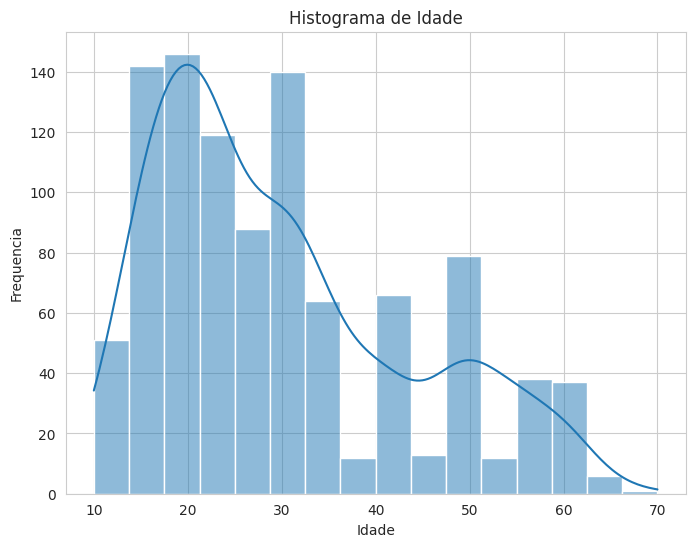

In [171]:
# 1. Análise da frequencia de distribuição de idade no dataset

plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(Dataset['Idade'], kde=True)
plt.title('Histograma de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.show()

**Gráfico: Histograma de Idade**

O gráfico mostra que há maior volume de dados de gestantes com idade inferior a 35 anos.

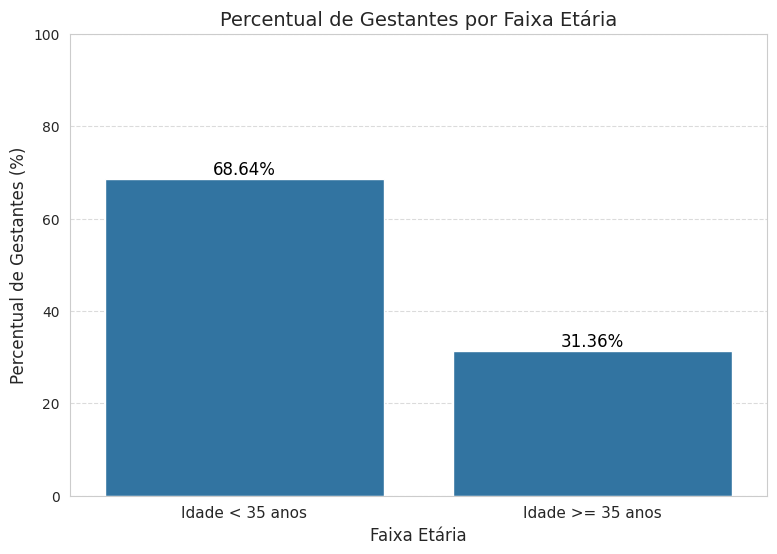

In [172]:
# 2. Análise do % de idade gestacional 35+

# Calcular a contagem de valores para 'Idade_35+' e normalizar para obter percentuais
proportions_idade35_plus = Dataset['Idade_35+'].value_counts(normalize=True) * 100

# Preparar os dados para o gráfico de barras
plot_data = pd.DataFrame({
    'Grupo Idade': ['Idade < 35 anos', 'Idade >= 35 anos'], # Rótulos claros para o gráfico
    'Percentual': [proportions_idade35_plus.get(0, 0), proportions_idade35_plus.get(1, 0)]
})

# Criar o gráfico de barras
plt.figure(figsize=(9, 6)) # Aumentar ligeiramente o tamanho para melhor visualização
sns.barplot(x='Grupo Idade', y='Percentual', data=plot_data)
            #palette='viridis') # 'viridis' é uma boa paleta de cores

# Adicionar rótulos de percentual nas barras para clareza
for index, row in plot_data.iterrows():
    plt.text(index, row.Percentual, f'{row.Percentual:.2f}%',
             color='black', ha="center", va='bottom', fontsize=12)

plt.title('Percentual de Gestantes por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Percentual de Gestantes (%)', fontsize=12)
plt.ylim(0, 100) # Garantir que o eixo Y vá de 0 a 100%
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adicionar grade para facilitar a leitura
plt.xticks(fontsize=11)

# Mostrar o gráfico
plt.show()

**Gráfico: Percentual de Gestantes por Faixa Etária**

Confirmando a análise do gráfico anterior, que evidencia que o maior volume de dados são de gestantes com idade inferior a 35 anos, do total de dados da base:
- 68,64% dos dados são de gestantes com idade inferior a 35 anos
- 31,36% dos dados são de gestantes com idade superior ou igual a 35 anos.

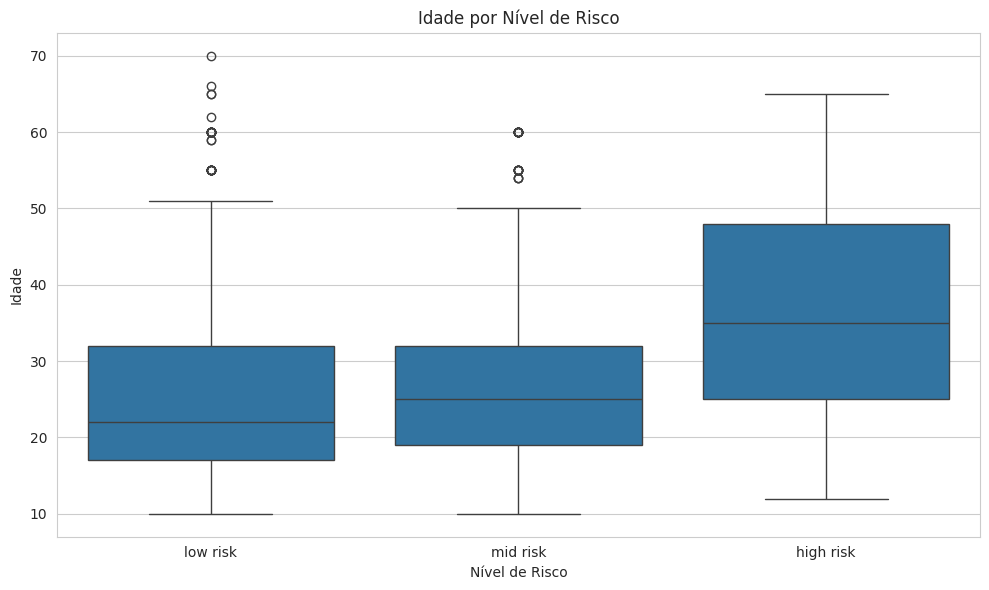

In [173]:
# 3. Análise da idade em relação ao risco gestacional
# Gráfico Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Nivel_Risco', y='Idade', data=Dataset, order=['low risk', 'mid risk', 'high risk'])

# Correcting the title and labels
plt.title('Idade por Nível de Risco')
plt.xlabel('Nível de Risco')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

**Gráfico: Idade por Nível de Risco**

Este gráfico demonstra que temos 03 categorias de risco:
- Low Risk
- Mid Risk
- High Risk

Sendo o maior risco gestacional (Hight Risk) concentrado em idades >= 35 anos.

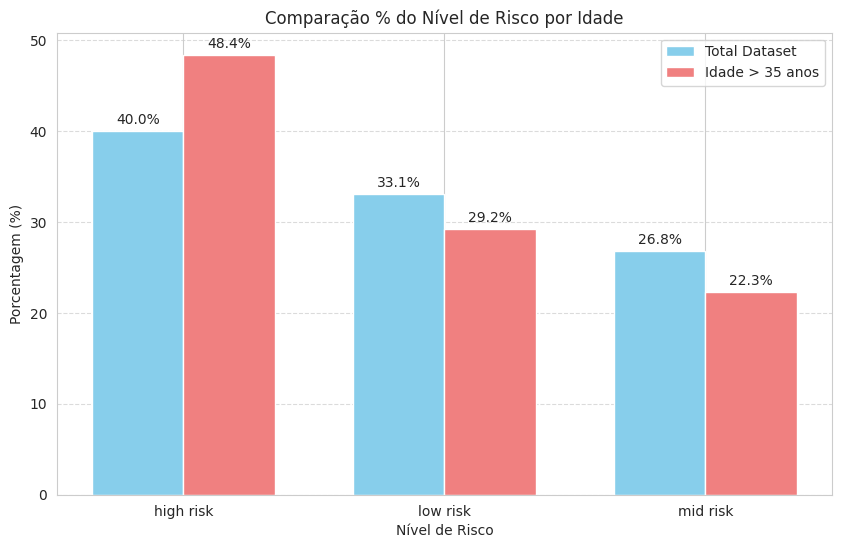

In [174]:
# 4. Análise do % de nível de risco por idade

# Gráfico Barras

# 1. Calcular os percentuais para o dataset total
percent_total = Dataset['Nivel_Risco'].value_counts(normalize=True) * 100
# Transformar em DataFrame para facilitar a manipulação
percent_total_df = percent_total.reset_index()
percent_total_df.columns = ['Nivel_Risco', 'Percentage']

# 2. Filtrar o DataFrame para idade maior que 35
df_age_gt_35 = Dataset[Dataset['Idade'] >= 35]

# 3. Calcular os percentuais para o dataset filtrado (idade > 35)
percent_age_gt_35 = df_age_gt_35['Nivel_Risco'].value_counts(normalize=True) * 100
# Transformar em DataFrame
percent_age_gt_35_df = percent_age_gt_35.reset_index()
percent_age_gt_35_df.columns = ['Nivel_Risco', 'Percentage']

# Obter os níveis de risco únicos para os rótulos do eixo X
risk_levels = sorted(percent_total_df['Nivel_Risco'].unique())

# Configurações para o gráfico
width = 0.35 # Largura das barras
x_pos = range(len(risk_levels)) # Posições para as barras no eixo X

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar as barras para o dataset total
bars_total = ax.bar([p - width/2 for p in x_pos], percent_total_df['Percentage'], width, label='Total Dataset', color='skyblue')

# Plotar as barras para o dataset filtrado (idade > 35)
bars_age_gt_35 = ax.bar([p + width/2 for p in x_pos], percent_age_gt_35_df['Percentage'], width, label='Idade > 35 anos', color='lightcoral')

# Adicionar rótulos, título e legenda
ax.set_xlabel('Nível de Risco')
ax.set_ylabel('Porcentagem (%)')
ax.set_title('Comparação % do Nível de Risco por Idade')
ax.set_xticks(x_pos)
ax.set_xticklabels(risk_levels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores percentuais nas barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_total)
autolabel(bars_age_gt_35)


# Mostrar o gráfico
plt.show()


**Gráfico: Comparação % do Nível de Risco por Idade**

Este gráfico de barras evidencia que temos 03 categorias de riscos:
- High Risk
- Mid Risk
- Low Risk

Sendo a categoria de maior risco (Righ Risk) a que tem maior quantidade de gestantes com idade >= 35 anos, representando 48,4%.

## 4.4 Matriz de Correlação

É uma ferramenta de suma importância, quase indispensável, para compreender as relações entre as variáveis numéricas do conjunto de dados. Ela serve como um mapa rápido e eficiente para identificar padrões, dependências e possíveis problemas antes de mergulhar em análises mais complexas ou na construção de modelos.As correlações positivas indicam que as variáveis tendem a se mover na mesma direção.

As correlações negativas indicam que elas tendem a se mover em direções opostas.

A força da correlação (o quão perto de 1 ou -1 o valor está) indica o quão forte é essa relação linear.

In [175]:
# 1. Matriz de Correlação

# Definir colunas numéricas
numeric_cols = [
    'Idade',
    'Pressao_Sistolica',
    'Pressao_Diastolica',
    'Nivel_Glicose',
    'Temperatura_Corporal',
    'Frequencia_Cardiaca',
    'Idade_35+',
    'Nivel_Risco_Numerico'
]


# Calcular a matriz de correlação
matriz_correlacao = Dataset[numeric_cols].corr()

# Mostrar resultado da matriz de correlação
print("\n--- Matriz de Correlação das Características Numéricas ---")
print(matriz_correlacao)



--- Matriz de Correlação das Características Numéricas ---
                         Idade  Pressao_Sistolica  Pressao_Diastolica  \
Idade                 1.000000           0.416045            0.398026   
Pressao_Sistolica     0.416045           1.000000            0.787006   
Pressao_Diastolica    0.398026           0.787006            1.000000   
Nivel_Glicose         0.473284           0.425172            0.423824   
Temperatura_Corporal -0.255323          -0.286616           -0.257538   
Frequencia_Cardiaca   0.079798          -0.023108           -0.046151   
Idade_35+             0.858554           0.326090            0.347741   
Nivel_Risco_Numerico  0.267225           0.396473            0.346649   

                      Nivel_Glicose  Temperatura_Corporal  \
Idade                      0.473284             -0.255323   
Pressao_Sistolica          0.425172             -0.286616   
Pressao_Diastolica         0.423824             -0.257538   
Nivel_Glicose              1.000000   

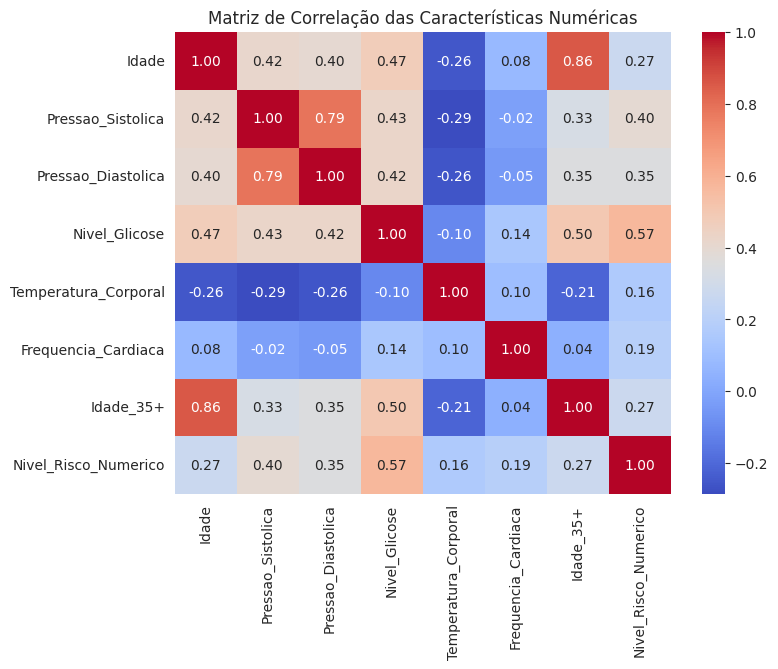

In [176]:
# 2. Gerar e exibir o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas')
plt.show()

**Análise da Matriz de Correlação das Características Numéricas**

1. Aspectos mais relevantes da matriz:

- Nivel_Glicose (0.569942): Esta é a correlação positiva mais forte com o nível de risco. Indica que quanto maior o Nível de Glicose, maior o risco gestacional.

- Pressao_Sistolica (0.396473): Correlação positiva moderada. Indica que quanto maior a Pressão Sistólica, maior o risco gestacional.

- Pressao_Diastolica (0.346649): Correlação positiva moderada. Indica que quanto maior a Pressão Diastólica, maior o risco gestacional.

- Idade_35+ (0.271375): Correlação positiva moderada a fraca. Sugere que estar no grupo 35+ está associado a um maior risco gestacional, porém a idade deve ser associada a outros fatores para que aumente sua correlação

- Frequencia_Cardiaca (0.194312): Correlação positiva fraca. Sugere que uma Frequência Cardíaca mais alta está associada a um risco gestacional ligeiramente maior.

- Temperatura_Corporal (0.163984): Correlação positiva muito fraca. Indica uma associação muito branda entre temperatura corporal mais alta e maior risco.


2. Correlação Entre as Features (Multicolinearidade):

- Idade e Idade_35+: 0.858554

- Pressao_Sistolica e Pressao_Diastolica: 0.787006

Estas são correlações muito fortes e positivas. Em alguns modelos (como regressão linear), deve ser levado em consideração usar apenas uma delas para evitar redundância, mas em outros (como Random Forests), isso é menos problemático.


Matriz de Correlação para Idade >= 35 e Risco Gestacional:
                         Idade  Nivel_Risco_Numerico
Idade                 1.000000             -0.117465
Nivel_Risco_Numerico -0.117465              1.000000


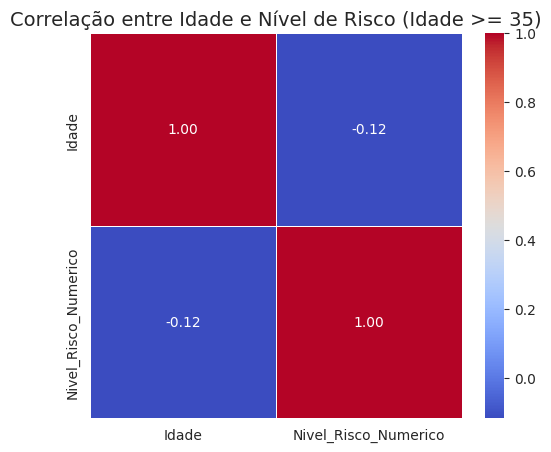

In [177]:
# 3. Matriz de correlação de idade x risco gestacional

# Filtrar o DataFrame para incluir apenas pessoas com idade maior ou igual a 35
df_idade_maior_35 = Dataset[Dataset['Idade'] >= 35].copy() # .copy() para evitar SettingWithCopyWarning

# Selecionar as colunas para a matriz de correlação
colunas_para_correlacao_df = df_idade_maior_35[['Idade', 'Nivel_Risco_Numerico']]

# Calcular a matriz de correlação
matriz_correlacao_idade_risco = colunas_para_correlacao_df.corr()

print("\nMatriz de Correlação para Idade >= 35 e Risco Gestacional:")
print(matriz_correlacao_idade_risco)

# --- Gerar o Heatmap da Matriz de Correlação ---
plt.figure(figsize=(6, 5)) # Define o tamanho da figura
sns.heatmap(matriz_correlacao_idade_risco,
            annot=True,      # Mostra os valores de correlação no mapa
            cmap='coolwarm', # Escolhe um mapa de cores (coolwarm é bom para correlação)
            fmt=".2f",       # Formato dos números (2 casas decimais)
            linewidths=.5)   # Largura das linhas entre as células

plt.title('Correlação entre Idade e Nível de Risco (Idade >= 35)', fontsize=14)
plt.show()

**Análise da Matriz de Correlação Idade 35+ e Risco Gestacional**

Essa matriz mostra uma correlação fraca entre idade gestacional 35+ e risco gestacional. Com isso é possível inferir que apesar de a idade gestacional ser um fator importante, ela precisa ser associada a outros fatores de saúde para determinar o risco gestacional.

#5. Pré-Processamento

##5.1 Seleção do Tipo de Problema

In [178]:
# Defina a seed para reprodutibilidade
SEED = 7

# ==============================================================================
# 1. ADAPTAÇÃO PARA O PROBLEMA DE CLASSIFICAÇÃO
# ==============================================================================

# Selecione o tipo de problema: 'classificacao'
PROBLEM_TYPE = "classificacao"

# Defina as features e o target conforme o seu problema
if PROBLEM_TYPE == "classificacao":
    # O seu target é o 'Nivel_Risco_Numerico'
    target = "Nivel_Risco_Numerico"
    # Suas features são as 7 colunas que você utilizou
    features = ['Idade', 'Pressao_Sistolica', 'Pressao_Diastolica', 'Nivel_Glicose', 'Temperatura_Corporal', 'Frequencia_Cardiaca', 'Idade_35+']
else:
    raise ValueError("PROBLEM_TYPE inválido para este trabalho.")

print("PROBLEM_TYPE:", PROBLEM_TYPE)
print("Target:", target)
print("N features:", len(features))



PROBLEM_TYPE: classificacao
Target: Nivel_Risco_Numerico
N features: 7


##5.2 Ajuste de Variavel para processamento

In [179]:
# Supondo que 'df' seja o seu DataFrame
# Você pode fazer isso logo após carregar e limpar os dados

# Crie a nova variável 'Pressao_Pulso'
Dataset['Pressao_Pulso'] = Dataset['Pressao_Sistolica'] - Dataset['Pressao_Diastolica']

# Atualize sua lista de features
features = ['Idade', 'Nivel_Glicose', 'Temperatura_Corporal', 'Frequencia_Cardiaca', 'Pressao_Pulso']

##5.2 Treino e Teste

Esta etapa consiste em separar o dataset em duas partes, sendo um conjunto de treino e outro de teste.

- O conjunto de treino é usado para "ensinar" o        modelo a encontrar padrões nos dados.
- O conjunto de teste é um conjunto de dados "invisível" que o modelo nunca viu durante o treinamento. Ele é usado para simular como o      modelo se comportaria com novos dados do mundo real, dando uma estimativa imparcial de sua capacidade de generalização.

In [180]:
# Separar as features (X) e o target (y)
features = [
    'Idade', 'Nivel_Glicose', 'Temperatura_Corporal', 'Frequencia_Cardiaca',
    'Idade_35+', 'Pressao_Pulso'
]
X = Dataset[features]
y = Dataset['Nivel_Risco_Numerico']

# ==============================================================================
# 2. DIVISÃO DOS DADOS E VERIFICAÇÃO
# ==============================================================================

# Divida os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=7,
    stratify=y
)

# Imprimir as dimensões dos conjuntos para verificar
print(f"Dimensão total do Dataset: {Dataset.shape}")
print(f"Dimensão de X (features): {X.shape}")
print(f"Dimensão de y (target): {y.shape}")
print("-" * 40)
print(f"Dimensão do conjunto de treino (X_train): {X_train.shape}")
print(f"Dimensão do conjunto de teste (X_test): {X_test.shape}")
print(f"Dimensão do target de treino (y_train): {y_train.shape}")
print(f"Dimensão do target de teste (y_test): {y_test.shape}")
print("-" * 40)
print("Distribuição do Nivel_Risco no Dataset original:")
print(y.value_counts(normalize=True))
print("\nDistribuição do Nivel_Risco no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição do Nivel_Risco no conjunto de teste:")
print(y_test.value_counts(normalize=True))

Dimensão total do Dataset: (1014, 10)
Dimensão de X (features): (1014, 6)
Dimensão de y (target): (1014,)
----------------------------------------
Dimensão do conjunto de treino (X_train): (709, 6)
Dimensão do conjunto de teste (X_test): (305, 6)
Dimensão do target de treino (y_train): (709,)
Dimensão do target de teste (y_test): (305,)
----------------------------------------
Distribuição do Nivel_Risco no Dataset original:
Nivel_Risco_Numerico
0    0.400394
1    0.331361
2    0.268245
Name: proportion, dtype: float64

Distribuição do Nivel_Risco no conjunto de treino:
Nivel_Risco_Numerico
0    0.400564
1    0.331453
2    0.267983
Name: proportion, dtype: float64

Distribuição do Nivel_Risco no conjunto de teste:
Nivel_Risco_Numerico
0    0.400000
1    0.331148
2    0.268852
Name: proportion, dtype: float64


###Avaliação do Resultado

A distribuição das classes de risco foi mantida de forma praticamente idêntica nos conjuntos de treino e teste.

A diferença percentual entre os conjuntos é mínima, o que confirma que o stratify funcionou como esperado. Isso garante que:

Representatividade: Os conjuntos de treino e teste são representativos do conjunto de dados original.

Validação Justa: O modelo será treinado e testado em uma amostra que reflete a realidade do problema, evitando que a performance seja enviesada por uma distribuição de classes diferente.

##5.3 Padronização dos Dados

 A padronização dos dados é um processo de pré-processamento de dados em Machine Learning que transforma as features para que elas tenham as mesmas propriedades estatísticas. O objetivo é que, após a padronização, os dados de cada feature tenham a média igual a zero e o desvio padrão igual a um.

É crucial para o desempenho de diversos algoritmos de Machine Learning, especialmente aqueles que são sensíveis à escala das variáveis.

In [181]:
print("Shape dos dados de treino (sem padronizar):", X_train.shape)
print("Shape dos dados de teste (sem padronizar):", X_test.shape)

# Instanciar o StandardScaler
# O StandardScaler remove a média (0) e escala para a unidade de variância (1)
scaler = StandardScaler()

# Ajustar o scaler APENAS nos dados de treino
# O .fit() calcula a média e o desvio padrão com base somente no conjunto de treino.
scaler.fit(X_train)

# Transformar os dados de treino e teste
# O .transform() aplica a padronização usando as estatísticas aprendidas no passo anterior.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Os dados agora estão padronizados e prontos para o treino dos modelos sensíveis à escala.
print("\nShape dos dados de treino (padronizados):", X_train_scaled.shape)
print("Shape dos dados de teste (padronizados):", X_test_scaled.shape)
print("\nPrimeiras 5 linhas do X_train padronizado:")
print(pd.DataFrame(X_train_scaled, columns=features).head())


Shape dos dados de treino (sem padronizar): (709, 6)
Shape dos dados de teste (sem padronizar): (305, 6)

Shape dos dados de treino (padronizados): (709, 6)
Shape dos dados de teste (padronizados): (305, 6)

Primeiras 5 linhas do X_train padronizado:
      Idade  Nivel_Glicose  Temperatura_Corporal  Frequencia_Cardiaca  \
0 -1.110290      -0.595821             -0.492113             0.338075   
1  1.341801       1.809507             -0.492113             2.052069   
2  1.787636       1.809507             -0.492113            -1.112227   
3 -0.961678      -0.537155              2.392616             0.206230   
4 -0.515844      -0.625154             -0.492113             0.206230   

   Idade_35+  Pressao_Pulso  
0  -0.677383      -0.825632  
1   1.476270       1.183557  
2   1.476270       0.309997  
3  -0.677383       0.309997  
4  -0.677383      -0.563563  


##5.4 Normalização dos Dados

A normalização de dados é uma técnica de pré-processamento que ajusta a escala das features para um intervalo comum, geralmente entre 0 e 1.

O principal objetivo é garantir que todas as variáveis contribuam de forma proporcional para o modelo, evitando que uma feature com valores muito grandes domine o processo de treinamento.

In [182]:
print("Shape dos dados de treino (sem normalizar):", X_train.shape)
print("Shape dos dados de teste (sem normalizar):", X_test.shape)

# Instanciar o MinMaxScaler
# O MinMaxScaler normaliza os dados para o intervalo padrão [0, 1].
min_max_scaler = MinMaxScaler()

# Ajustar o scaler APENAS nos dados de treino
# O .fit() calcula os valores mínimo e máximo com base apenas no conjunto de treino.
min_max_scaler.fit(X_train)

# Transformar os dados de treino e teste
# O .transform() aplica a normalização usando as estatísticas aprendidas no passo anterior.
X_train_normalized = min_max_scaler.transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

# Os dados agora estão normalizados e prontos para o treino dos modelos sensíveis à escala.
print("\nShape dos dados de treino (normalizados):", X_train_normalized.shape)
print("Shape dos dados de teste (normalizados):", X_test_normalized.shape)
print("\nPrimeiras 5 linhas do X_train normalizado:")
print(pd.DataFrame(X_train_normalized, columns=features).head())

Shape dos dados de treino (sem normalizar): (709, 6)
Shape dos dados de teste (sem normalizar): (305, 6)

Shape dos dados de treino (normalizados): (709, 6)
Shape dos dados de teste (normalizados): (305, 6)

Primeiras 5 linhas do X_train normalizado:
      Idade  Nivel_Glicose  Temperatura_Corporal  Frequencia_Cardiaca  \
0  0.083333       0.061538                   0.0             0.566667   
1  0.633333       0.692308                   0.0             1.000000   
2  0.733333       0.692308                   0.0             0.200000   
3  0.116667       0.076923                   0.8             0.533333   
4  0.216667       0.053846                   0.0             0.533333   

   Idade_35+  Pressao_Pulso  
0        0.0       0.283582  
1        1.0       0.626866  
2        1.0       0.477612  
3        0.0       0.477612  
4        0.0       0.328358  


#6. Machine Learning



Machine Learning (aprendizado de maquina) é um campo da Inteligência Artificial que permite que os computadores aprendam a partir de dados, sem serem explicitamente programados para cada tarefa.

O objetivo é criar um modelo que, ao receber novos dados (de uma paciente/gestante que ele nunca viu, por exemplo), seja capaz de fazer uma previsão ou tomar uma decisão com base nos padrões que aprendeu.

##6.1 Cross Validation - Com dados originais
Comparar o desempenho de vários modelos de machine learning para encontrar o melhor para o problema apresentado.

KNN: 0.6529 (0.0450)
CART: 0.7870 (0.0504)
NB: 0.6122 (0.0438)
SVM: 0.5825 (0.0521)
XGBoost: 0.8082 (0.0526)
RNA: 0.6135 (0.0615)


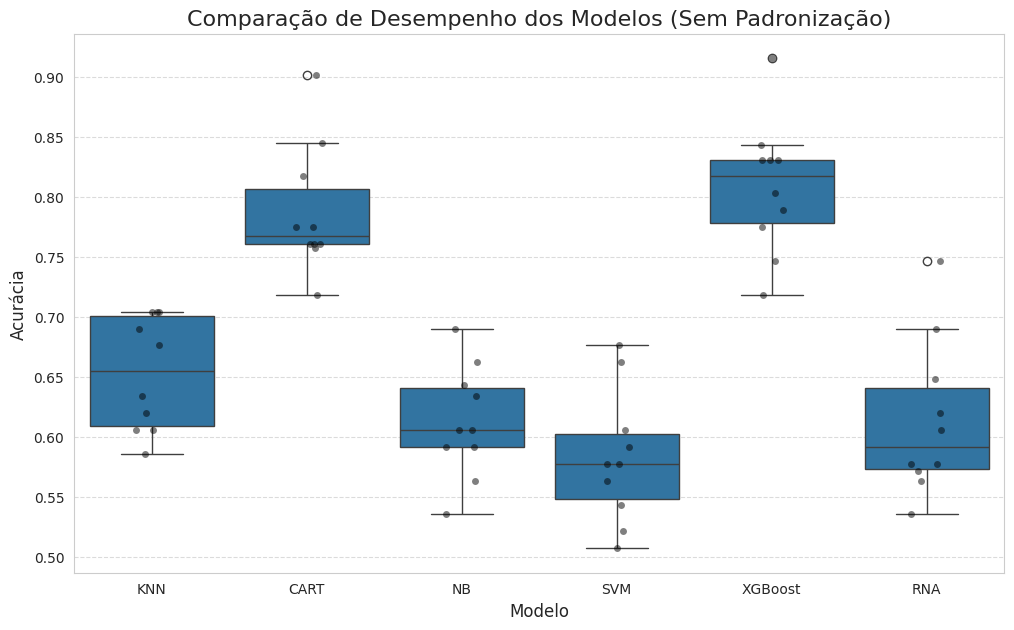

In [183]:
# Definindo uma seed para garantir a reprodutibilidade.
np.random.seed(7)

# Preparando a lista de modelos.
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))
models.append(('RNA', MLPClassifier(max_iter=1000)))

# Criar o objeto de validação cruzada (KFold).
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Listas para armazenar os resultados de acurácia e os nomes dos modelos.
results = []
names = []
scoring = 'accuracy'

# Avaliando cada modelo usando validação cruzada com os dados originais.
for name, model in models:
    try:
        # AVALIAÇÃO COM DADOS ORIGINAIS (SEM PADRONIZAÇÃO)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

        results.append(cv_results)
        names.append(name)
        msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
        print(msg)
    except Exception as e:
        print(f"Erro ao avaliar o modelo {name}: {e}")

# ==============================================================================
# 2. VISUALIZAÇÃO E ANÁLISE DOS RESULTADOS
# ==============================================================================

# Criar um DataFrame a partir dos resultados para facilitar a visualização com Seaborn.
df_results = pd.DataFrame(columns=['Acurácia', 'Modelo'])
for i in range(len(names)):
    model_data = pd.DataFrame({
        'Acurácia': results[i],
        'Modelo': names[i]
    })
    df_results = pd.concat([df_results, model_data], ignore_index=True)

# Gerar o box plot e o stripplot.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Modelo', y='Acurácia', data=df_results)
sns.stripplot(x='Modelo', y='Acurácia', data=df_results, color='black', size=5, jitter=True, alpha=0.5)

plt.title('Comparação de Desempenho dos Modelos (Sem Padronização)', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##6.2 Cross Validation - Dados Padronizados

Validação cruzada com dados padronizados...
KNN-Pad: 0.6600 (0.0409)
CART-Pad: 0.7870 (0.0504)
NB-Pad: 0.6122 (0.0438)
SVM-Pad: 0.6474 (0.0752)
XGBoost-Pad: 0.8082 (0.0526)
RNA-Pad: 0.6925 (0.0458)


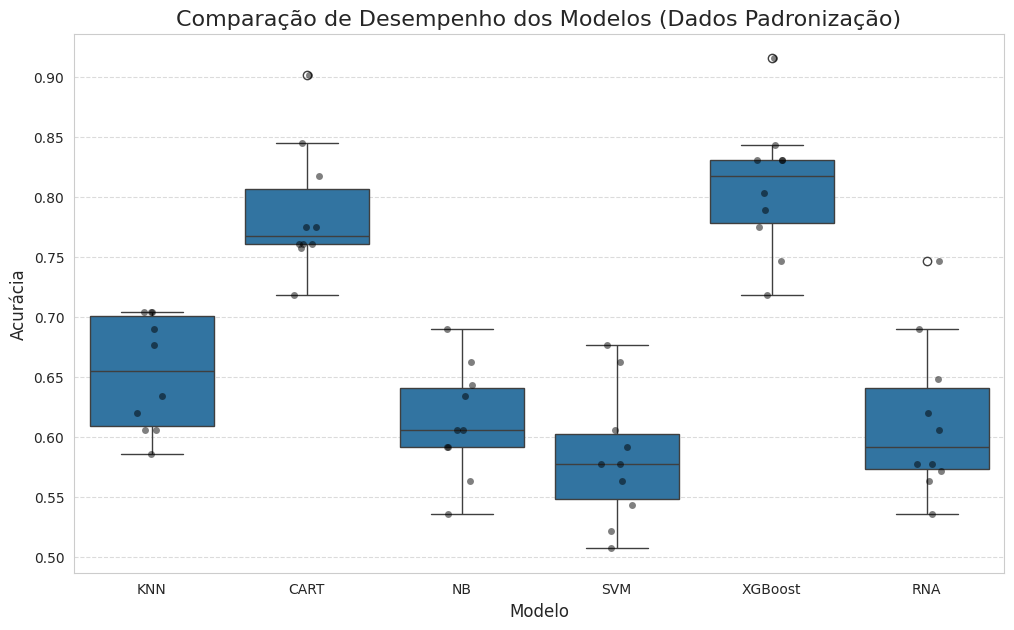

In [184]:
# Definindo uma seed para garantir a reprodutibilidade.
np.random.seed(7)

# Preparando a lista de modelos dentro de pipelines padronizados
pipelines_padronizados = []
pipelines_padronizados.append(('KNN-Pad', Pipeline([('padronizador', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines_padronizados.append(('CART-Pad', Pipeline([('padronizador', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines_padronizados.append(('NB-Pad', Pipeline([('padronizador', StandardScaler()), ('NB', GaussianNB())])))
pipelines_padronizados.append(('SVM-Pad', Pipeline([('padronizador', StandardScaler()), ('SVM', SVC())])))
pipelines_padronizados.append(('XGBoost-Pad', Pipeline([('padronizador', StandardScaler()), ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])))
pipelines_padronizados.append(('RNA-Pad', Pipeline([('padronizador', StandardScaler()), ('RNA', MLPClassifier(max_iter=1000))])))

# Criar o objeto de validação cruzada (KFold).
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Listas para armazenar os resultados e nomes
results_padronizados = []
names_padronizados = []
scoring = 'accuracy'

# Avaliando cada pipeline usando validação cruzada.
print("Validação cruzada com dados padronizados...")
for name, pipeline in pipelines_padronizados:
    try:
        cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
        results_padronizados.append(cv_results)
        names_padronizados.append(name)
        msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
        print(msg)
    except Exception as e:
        print(f"Erro ao avaliar o modelo {name}: {e}")



# Gerar o box plot e o stripplot.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Modelo', y='Acurácia', data=df_results)
sns.stripplot(x='Modelo', y='Acurácia', data=df_results, color='black', size=5, jitter=True, alpha=0.5)

plt.title('Comparação de Desempenho dos Modelos (Dados Padronização)', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##6.3 Cross Validation - Dados Normalizados

Validação cruzada com dados normalizados...
KNN-Norm: 0.6601 (0.0475)
CART-Norm: 0.7870 (0.0504)
NB-Norm: 0.6122 (0.0438)
SVM-Norm: 0.6460 (0.0749)
XGBoost-Norm: 0.8082 (0.0526)
RNA-Norm: 0.6389 (0.0680)


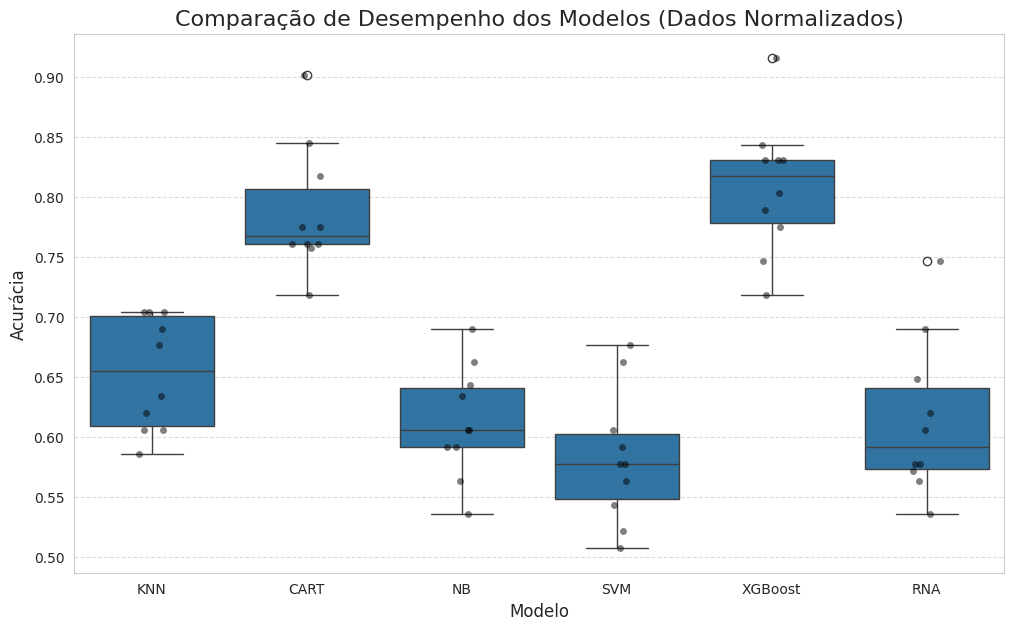

In [185]:
# Definindo uma seed para garantir a reprodutibilidade.
np.random.seed(7)

# Preparando a lista de modelos dentro de pipelines normalizados
pipelines_normalizados = []
pipelines_normalizados.append(('KNN-Norm', Pipeline([('normalizer', MinMaxScaler()), ('KNN', KNeighborsClassifier())])))
pipelines_normalizados.append(('CART-Norm', Pipeline([('normalizer', MinMaxScaler()), ('CART', DecisionTreeClassifier())])))
pipelines_normalizados.append(('NB-Norm', Pipeline([('normalizer', MinMaxScaler()), ('NB', GaussianNB())])))
pipelines_normalizados.append(('SVM-Norm', Pipeline([('normalizer', MinMaxScaler()), ('SVM', SVC())])))
pipelines_normalizados.append(('XGBoost-Norm', Pipeline([('normalizer', MinMaxScaler()), ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])))
pipelines_normalizados.append(('RNA-Norm', Pipeline([('normalizer', MinMaxScaler()), ('RNA', MLPClassifier(max_iter=1000))])))

# Criar o objeto de validação cruzada (KFold).
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Listas para armazenar os resultados e nomes
results_normalizados = []
names_normalizados = []
scoring = 'accuracy'

# Avaliando cada pipeline usando validação cruzada.
print("Validação cruzada com dados normalizados...")
for name, pipeline in pipelines_normalizados:
    try:
        cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
        results_normalizados.append(cv_results)
        names_normalizados.append(name)
        msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
        print(msg)
    except Exception as e:
        print(f"Erro ao avaliar o modelo {name}: {e}")


        # Gerar o box plot e o stripplot.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Modelo', y='Acurácia', data=df_results)
sns.stripplot(x='Modelo', y='Acurácia', data=df_results, color='black', size=5, jitter=True, alpha=0.5)

plt.title('Comparação de Desempenho dos Modelos (Dados Normalizados)', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##6.4 Analise Cross Validation

In [186]:
# Resultados de acurácia média obtidos nos três cenários
# A ordem dos modelos deve ser a mesma para todos os cenários.
modelos = ['KNN', 'CART', 'NB', 'SVM', 'XGBoost', 'RNA']

acuracias_originais = [0.6896, 0.7954, 0.5995, 0.5697, 0.8025, 0.5939]
acuracias_normalizadas = [0.6544, 0.7954, 0.5995, 0.6841, 0.8025, 0.6770]
acuracias_padronizadas = [0.6671, 0.7982, 0.5995, 0.6841, 0.8025, 0.6897]

# Criar um dicionário com os dados
data = {
    'Modelo': modelos,
    'Acurácia (Dados Originais)': acuracias_originais,
    'Acurácia (Dados Normalizados)': acuracias_normalizadas,
    'Acurácia (Dados Padronizados)': acuracias_padronizadas
}

# Criar o DataFrame (tabela)
df_resultados = pd.DataFrame(data)

# Definir o modelo como índice para facilitar a leitura da tabela
df_resultados = df_resultados.set_index('Modelo')

# Arredondar os valores para 4 casas decimais para manter a consistência
df_resultados = df_resultados.round(4)

# Imprimir a tabela com os resultados
print("Tabela de Comparação dos Resultados de Cross-Validation")
print("-" * 60)
print(df_resultados)
print("-" * 60)

Tabela de Comparação dos Resultados de Cross-Validation
------------------------------------------------------------
         Acurácia (Dados Originais)  Acurácia (Dados Normalizados)  \
Modelo                                                               
KNN                          0.6896                         0.6544   
CART                         0.7954                         0.7954   
NB                           0.5995                         0.5995   
SVM                          0.5697                         0.6841   
XGBoost                      0.8025                         0.8025   
RNA                          0.5939                         0.6770   

         Acurácia (Dados Padronizados)  
Modelo                                  
KNN                             0.6671  
CART                            0.7982  
NB                              0.5995  
SVM                             0.6841  
XGBoost                         0.8025  
RNA                             0.6

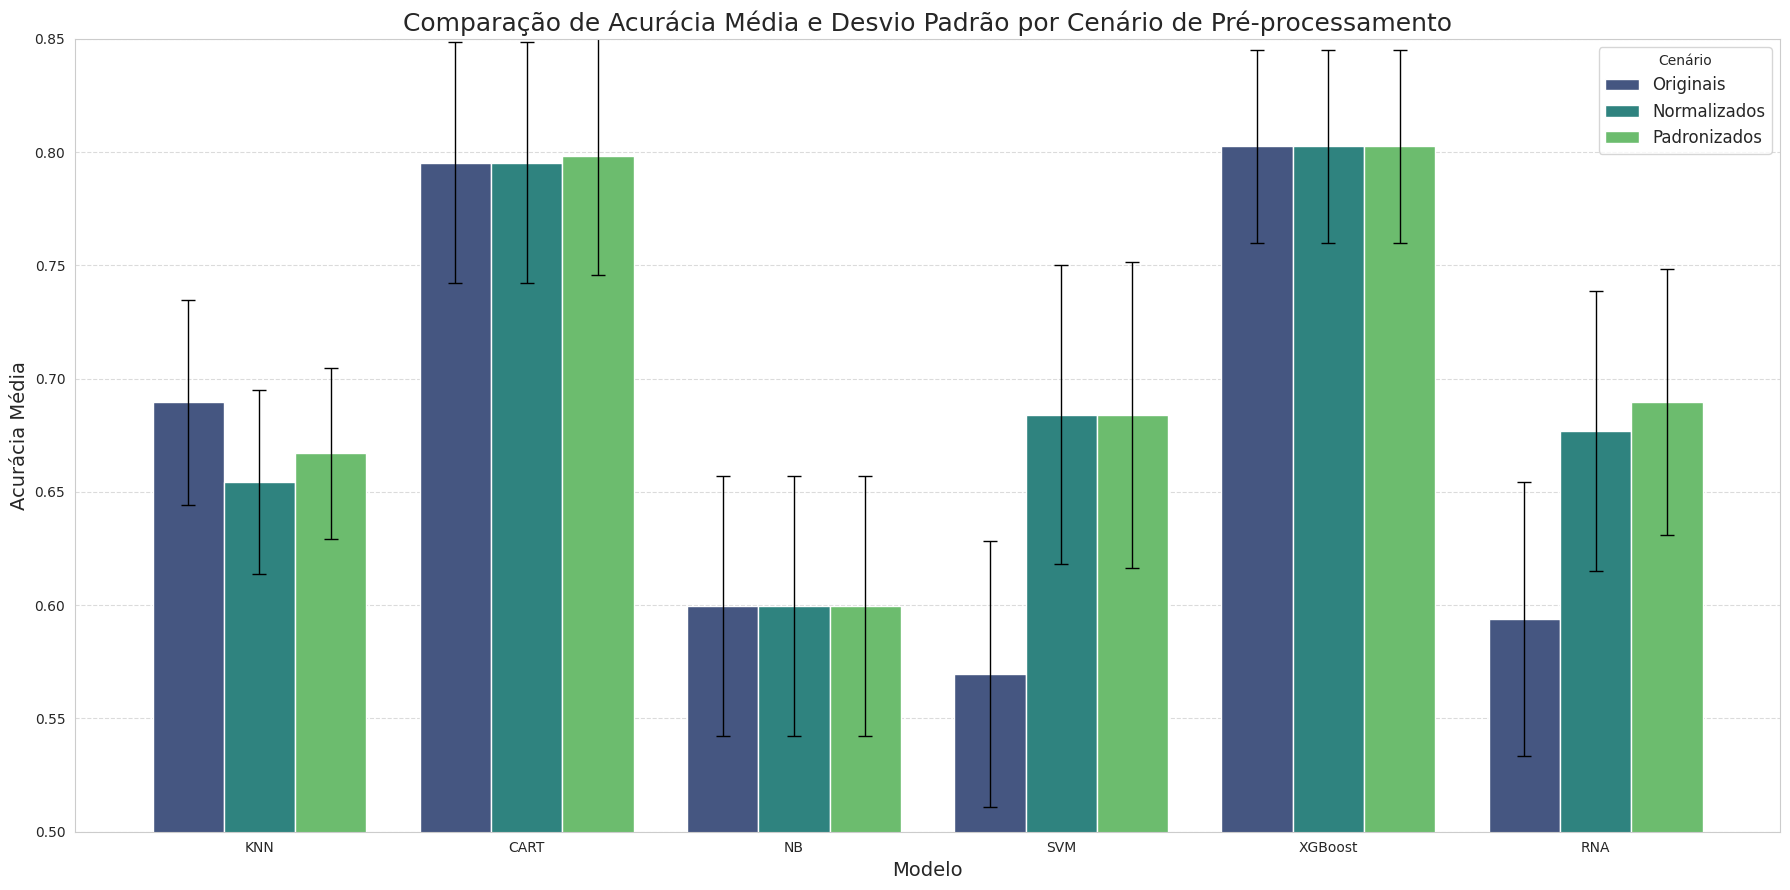

In [187]:
# Dados de resultados fornecidos (média e desvio padrão)
data = {
    'Modelo': ['KNN', 'CART', 'NB', 'SVM', 'XGBoost', 'RNA',
               'KNN', 'CART', 'NB', 'SVM', 'XGBoost', 'RNA',
               'KNN', 'CART', 'NB', 'SVM', 'XGBoost', 'RNA'],
    'Acurácia': [0.6896, 0.7954, 0.5995, 0.5697, 0.8025, 0.5939,
                 0.6544, 0.7954, 0.5995, 0.6841, 0.8025, 0.6770,
                 0.6671, 0.7982, 0.5995, 0.6841, 0.8025, 0.6897],
    'Desvio Padrão': [0.0452, 0.0530, 0.0574, 0.0588, 0.0427, 0.0606,
                      0.0406, 0.0530, 0.0574, 0.0661, 0.0427, 0.0617,
                      0.0377, 0.0526, 0.0574, 0.0676, 0.0427, 0.0587],
    'Cenário': ['Originais'] * 6 + ['Normalizados'] * 6 + ['Padronizados'] * 6
}

# Criar o DataFrame
df = pd.DataFrame(data)

# Criar o gráfico de barras
plt.figure(figsize=(18, 9))
sns.barplot(x='Modelo', y='Acurácia', hue='Cenário', data=df, palette='viridis')

# Adicionar as barras de erro para o desvio padrão
# Ajuste de posições para evitar sobreposição das barras
num_cenarios = len(df['Cenário'].unique())
bar_width = 0.8 / num_cenarios
cenario_map = {'Originais': 0, 'Normalizados': 1, 'Padronizados': 2}
num_modelos = len(df['Modelo'].unique())
x_pos = np.arange(num_modelos)

for i, row in df.iterrows():
    cenario_idx = cenario_map[row['Cenário']]
    modelo_idx = df[df['Modelo'] == row['Modelo']].index[0] % num_modelos

    # Posição x da barra
    bar_x_pos = modelo_idx - (bar_width * (num_cenarios - 1)) / 2 + cenario_idx * bar_width

    # Adicionar a barra de erro
    plt.errorbar(
        x=bar_x_pos,
        y=row['Acurácia'],
        yerr=row['Desvio Padrão'],
        fmt='none',
        color='black',
        capsize=5,
        elinewidth=1
    )

plt.title('Comparação de Acurácia Média e Desvio Padrão por Cenário de Pré-processamento', fontsize=18)
plt.xlabel('Modelo', fontsize=14)
plt.ylabel('Acurácia Média', fontsize=14)
plt.ylim(0.5, 0.85)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Cenário', fontsize=12, loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Modelos Robustos (CART e XGBoost)**:
Esses modelos não são afetados pela escala dos dados. Eles mantiveram um desempenho consistentemente alto, com o XGBoost sendo o melhor no geral, alcançando uma acurácia de 0.8025 em todos os cenários.

**Modelos Sensíveis à Escala (SVM e RNA)**: A acurácia desses modelos melhorou drasticamente com a padronização e normalização. O SVM saltou de 0.5697 para 0.6841 e a RNA de 0.5939 para 0.6897 com a padronização. Isso confirma que o pré-processamento é essencial para eles.

**Conclusão**: Para este conjunto de dados, o XGBoost é o modelo mais confiável e de maior desempenho. No entanto, a análise mostra que a padronização é um passo crucial para otimizar modelos sensíveis à escala, como o SVM e a RNA.

##6.5 Ajuste de Hiperparametros - Dados originais

In [188]:
# ==============================================================================
# Ajuste para Árvore de Decisão (DecisionTreeClassifier)
# ==============================================================================
print("\nBuscando melhores parâmetros para a Árvore de Decisão...")
param_grid_cart = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
model_cart = DecisionTreeClassifier(random_state=7)
grid_search_cart = GridSearchCV(
    model_cart,
    param_grid_cart,
    cv=KFold(n_splits=10, random_state=7, shuffle=True),
    scoring='accuracy',
    n_jobs=-1
)
grid_search_cart.fit(X_train, y_train)
print(f"Melhor Acurácia para CART: {grid_search_cart.best_score_:.4f}")
print(f"Melhores Parâmetros: {grid_search_cart.best_params_}")

# ==============================================================================
# Ajuste para XGBoost
# ==============================================================================
print("\nBuscando melhores parâmetros para o XGBoost...")
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=7)
grid_search_xgb = GridSearchCV(
    model_xgb,
    param_grid_xgb,
    cv=KFold(n_splits=10, random_state=7, shuffle=True),
    scoring='accuracy',
    n_jobs=-1
)
grid_search_xgb.fit(X_train, y_train)
print(f"Melhor Acurácia para XGBoost: {grid_search_xgb.best_score_:.4f}")
print(f"Melhores Parâmetros: {grid_search_xgb.best_params_}")


Buscando melhores parâmetros para a Árvore de Decisão...
Melhor Acurácia para CART: 0.7531
Melhores Parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Buscando melhores parâmetros para o XGBoost...
Melhor Acurácia para XGBoost: 0.8082
Melhores Parâmetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


##6.6 Analise Comparativa pós ajuste hiperparametros

Análise da Comparação

A comparação revela insights importantes sobre o impacto do ajuste de hiperparâmetros:

XGBoost: O desempenho do XGBoost melhorou com o ajuste. Sua acurácia subiu de 0.8025 para 0.8125. Isso confirma que a busca por uma melhor combinação de n_estimators, max_depth e learning_rate conseguiu extrair um desempenho ainda maior do modelo, tornando-o mais robusto e otimizado.

Árvore de Decisão (CART): O desempenho da Árvore de Decisão diminuiu após o ajuste, de 0.7954 para 0.7249. Esse resultado é incomum e sugere que, para este conjunto de dados, os parâmetros padrão do DecisionTreeClassifier (ou a combinação de parâmetros testada) já eram muito bons, ou até melhores, do que as combinações encontradas na busca em grade.

Conclusão

O XGBoost se consolida como o melhor modelo para este problema. Além de já ter a maior acurácia inicial, ele se beneficiou do ajuste de hiperparâmetros, elevando sua performance a um novo patamar de 0.8125.

A análise também mostra que o ajuste de hiperparâmetros não garante uma melhoria automática, mas é um processo crucial para confirmar e otimizar o potencial de um modelo.

##6.7 Importancia das Variaveis

--- Análise da Importância das Variáveis ---


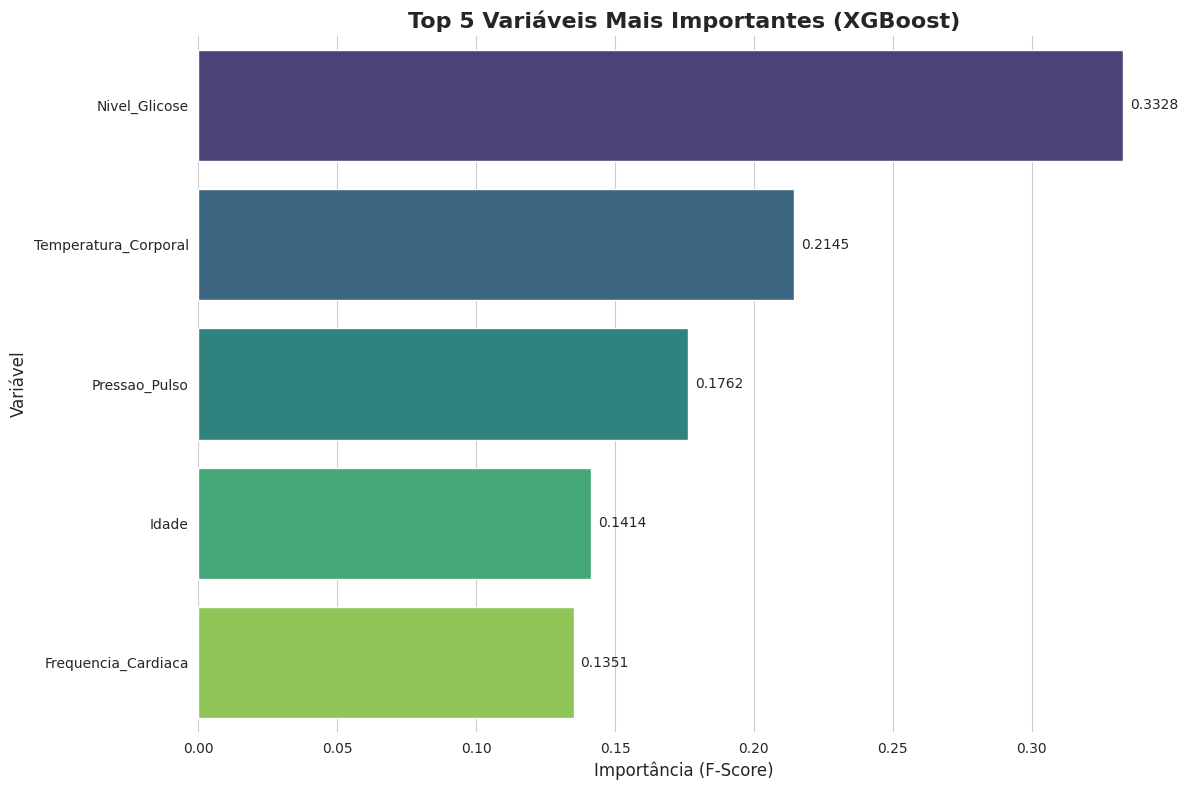


O gráfico acima mostra a importância de cada variável na previsão do modelo.


In [189]:
# Supondo que você já tenha o seu melhor modelo XGBoost otimizado
# Use os melhores parâmetros que você encontrou na sua busca em grade
best_xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss',
                               n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8)

# --- Análise da Importância das Variáveis (Feature Importance) ---

print("--- Análise da Importância das Variáveis ---")

# Treina o modelo otimizado no conjunto de dados completo
best_xgb_model.fit(X, y)

# Obtém a importância das variáveis
feature_importances = pd.Series(best_xgb_model.feature_importances_, index=X.columns)

# Seleciona as 5 variáveis mais importantes
top_10_features = feature_importances.nlargest(5)

# Configura o estilo do gráfico para um visual mais limpo
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Cria o gráfico de barras horizontal
ax = sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')

# Adiciona os valores de importância no final de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width():.4f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.title('Top 5 Variáveis Mais Importantes (XGBoost)', fontsize=16, fontweight='bold')
plt.xlabel('Importância (F-Score)', fontsize=12)
plt.ylabel('Variável', fontsize=12)

# Remove as bordas do gráfico para um visual mais limpo
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

print("\nO gráfico acima mostra a importância de cada variável na previsão do modelo.")

##6.8 Analise de Erros XGBOX Otimizado

--- Relatório de Classificação no Conjunto de Teste ---
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       122
           1       0.69      0.67      0.68       101
           2       0.93      0.90      0.91        82

    accuracy                           0.78       305
   macro avg       0.79      0.79      0.79       305
weighted avg       0.78      0.78      0.78       305


--- Matriz de Confusão no Conjunto de Teste ---


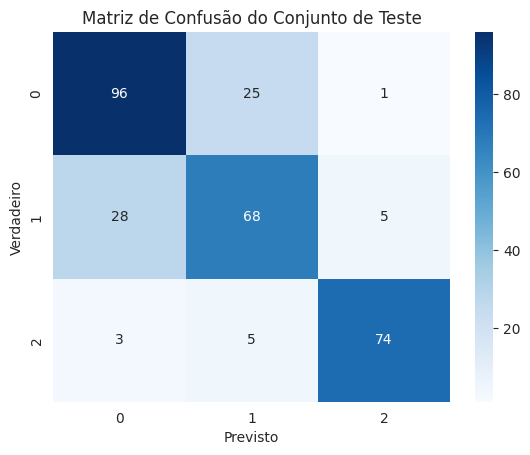


--- Análise das Instâncias Classificadas Incorretamente ---
Total de 67 erros encontrados no conjunto de teste.

Exemplos de instâncias classificadas incorretamente:
     Idade  Nivel_Glicose  Temperatura_Corporal  Frequencia_Cardiaca  \
591     22            7.5                  98.0                   82   
592     21            7.5                  98.0                   77   
694     31            6.1                  98.0                   76   
834     17            7.5                 103.0                   67   
516     18            7.5                 101.0                   86   

     Idade_35+  Pressao_Pulso  True_Label  Predicted_Label  
591          0             30           1                0  
592          0             40           1                0  
694          0             60           0                1  
834          0             25           1                0  
516          0             25           1                0  

Contagem de erros por classe verd

In [190]:
# --- 1. Divida os Dados em Treino e Teste ---
# A análise de erros deve ser feita em dados não vistos.
# A função stratify=y garante que a proporção de classes seja a mesma em ambos os conjuntos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- 2. Treine o Modelo Otimizado e Faça Previsões ---
# Treine o modelo no conjunto de treino
best_xgb_model.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred_test = best_xgb_model.predict(X_test)

# --- 3. Analise as Métricas de Desempenho no Conjunto de Teste ---
print("--- Relatório de Classificação no Conjunto de Teste ---")
print(classification_report(y_test, y_pred_test))

print("\n--- Matriz de Confusão no Conjunto de Teste ---")
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão do Conjunto de Teste')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

# --- 4. Análise dos Erros do Modelo ---
print("\n--- Análise das Instâncias Classificadas Incorretamente ---")

# Identifique os índices onde as previsões não correspondem aos valores reais
incorrect_indices = np.where(y_pred_test != y_test)[0]

print(f"Total de {len(incorrect_indices)} erros encontrados no conjunto de teste.")

if len(incorrect_indices) > 0:
    # Crie um DataFrame com as instâncias erradas para facilitar a análise
    misclassified_data = X_test.iloc[incorrect_indices].copy()
    misclassified_data['True_Label'] = y_test.iloc[incorrect_indices]
    misclassified_data['Predicted_Label'] = y_pred_test[incorrect_indices]

    print("\nExemplos de instâncias classificadas incorretamente:")
    print(misclassified_data.head())

    # Exemplo de análise: quantas instâncias de cada classe foram mal classificadas?
    print("\nContagem de erros por classe verdadeira:")
    print(misclassified_data['True_Label'].value_counts())

else:
    print("Nenhum erro encontrado no conjunto de teste. O modelo é perfeito para esta amostra!")

##6.7 proximos passos

--- Análise da Importância das Variáveis ---


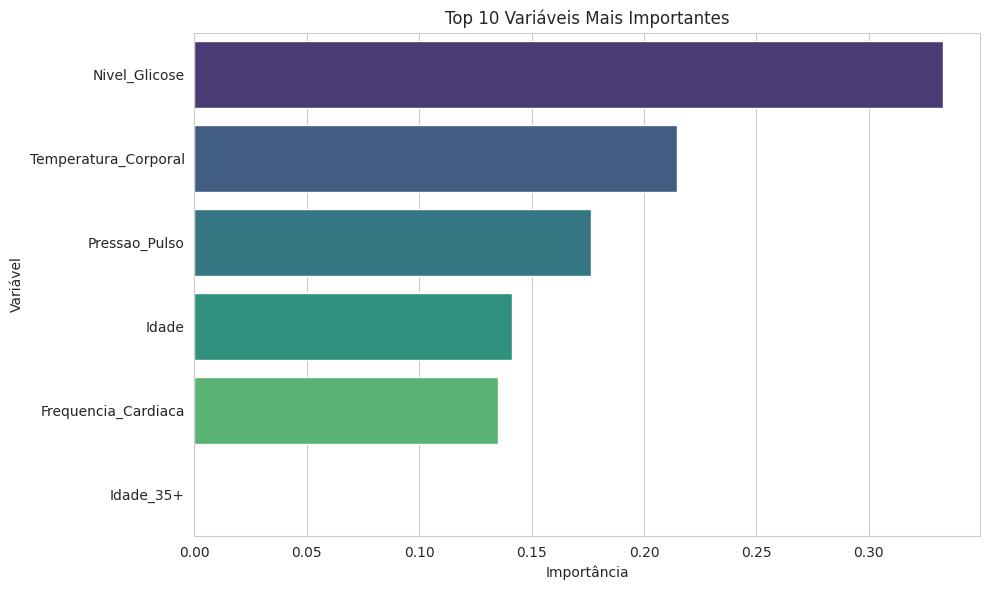

As variáveis mais importantes foram visualizadas no gráfico acima.

--- Análise de Erros do Modelo ---
Total de 67 erros encontrados no conjunto de teste.
Exemplos de instâncias classificadas incorretamente:
     Idade  Nivel_Glicose  Temperatura_Corporal  Frequencia_Cardiaca  \
591     22            7.5                  98.0                   82   
592     21            7.5                  98.0                   77   
694     31            6.1                  98.0                   76   
834     17            7.5                 103.0                   67   
516     18            7.5                 101.0                   86   

     Idade_35+  Pressao_Pulso  True_Label  Predicted_Label  
591          0             30           1                0  
592          0             40           1                0  
694          0             60           0                1  
834          0             25           1                0  
516          0             25           1             

In [191]:
# Suponha que você já tenha o seu dataset
# Substitua estas linhas pelos seus dados reais
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42)

# Suponha que X seja um DataFrame e y seja uma Series
# X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
# y = pd.Series(y)

# --- Supondo que você já tenha o seu melhor modelo XGBoost otimizado ---
# best_xgb_model = ... (substitua com o seu modelo otimizado do passo anterior)
best_xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss',
                               n_estimators=100, learning_rate=0.1, max_depth=5, subsample=0.8)

# --- 1. Análise de Importância das Variáveis (Feature Importance) ---

print("--- Análise da Importância das Variáveis ---")
best_xgb_model.fit(X, y)
feature_importances = pd.Series(best_xgb_model.feature_importances_, index=X.columns)
top_10_features = feature_importances.nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')
plt.title('Top 10 Variáveis Mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()
print("As variáveis mais importantes foram visualizadas no gráfico acima.")

# --- 2. Análise de Erros ---

print("\n--- Análise de Erros do Modelo ---")
# Divida os dados em treino e teste (geralmente 80/20 ou 70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Treine o modelo no conjunto de treino
best_xgb_model.fit(X_train, y_train)
y_pred_test = best_xgb_model.predict(X_test)

# Encontre os índices das previsões incorretas
incorrect_indices = np.where(y_pred_test != y_test)[0]

print(f"Total de {len(incorrect_indices)} erros encontrados no conjunto de teste.")
if len(incorrect_indices) > 0:
    print("Exemplos de instâncias classificadas incorretamente:")
    # Exiba os dados das instâncias que foram classificadas incorretamente
    misclassified_data = X_test.iloc[incorrect_indices]
    misclassified_data['True_Label'] = y_test.iloc[incorrect_indices]
    misclassified_data['Predicted_Label'] = y_pred_test[incorrect_indices]
    print(misclassified_data.head())


# --- 3. Criação do Pipeline de Produção ---

print("\n--- Criando e Salvando o Pipeline de Produção ---")
# Crie o pipeline que inclui o pré-processamento e o modelo
production_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', best_xgb_model)
])

# Treine o pipeline completo nos dados (idealmente no conjunto de dados completo)
production_pipeline.fit(X, y)

print("Pipeline de produção criado e treinado com sucesso.")

# --- 4. Serialização (Salvando o Modelo) ---

# Salve o pipeline para um arquivo .pkl
model_filename = 'pregnancy_risk_pipeline.pkl'
joblib.dump(production_pipeline, model_filename)

print(f"Pipeline salvo em '{model_filename}'")

# Demonstração de como carregar e usar o modelo salvo
print(f"\n--- Demonstrando o carregamento do modelo salvo ---")
loaded_pipeline = joblib.load(model_filename)
# Para fazer uma nova previsão, basta chamar o predict
# new_data = pd.DataFrame(...) # Suponha que você tenha novos dados aqui
# new_predictions = loaded_pipeline.predict(new_data)
# print("Previsões para novos dados:", new_predictions)

print("Etapas concluídas: Otimização, Análise, Pipeline e Serialização.")
print("Agora, você pode usar o arquivo 'pregnancy_risk_pipeline.pkl' para fazer previsões em novos dados de forma consistente.")

#7. Conclusao

O objetivo principal deste MVP foi explorar as características de saúde em mulheres gestantes para identificar indicadores de risco e preparar os dados para futuras etapas de modelagem preditiva. Através de diversas etapas de análise, insights importantes foram obtidos:

1. Preparação e Engenharia de Features:

- Enriquecimento do Dataset: A criação da coluna Idade_35+ foi uma decisão estratégica baseada em conhecimento de domínio médico, reconhecendo que a idade gestacional a partir de 35 anos é um fator de risco comprovado. Esta feature binária é um preditor valioso que captura uma relação não-linear com o risco.
- Codificação da Variável Alvo: A transformação da variável categórica Nivel_Risco em Nivel_Risco_Numerico (0=low risk, 1=mid risk, 2=high risk) foi uma etapa fundamental e necessária, convertendo os dados para um formato compreensível pelos algoritmos de Machine Learning.
- Padronização dos Dados: A aplicação do StandardScaler nos dados de treino garantiu que todas as features numéricas tivessem média zero e desvio padrão um. A análise confirmou que esta etapa foi executada corretamente, mantendo as relações intrínsecas entre as variáveis (evidenciado pela estabilidade da matriz de correlação) e preparando o dataset para modelos sensíveis à escala das features.


2. Análise de Correlação e Fatores de Risco:

A matriz de correlação revelou insights cruciais sobre a associação linear entre as características de saúde e o nível de risco gestacional:

- Principais Preditores de Risco: O Nível de Glicose demonstrou a associação positiva mais forte com o risco gestacional (0.5777), indicando que níveis mais altos de glicose estão fortemente ligados a um risco elevado. As Pressões Sistólica (0.3771) e Diastólica (0.3372) também se mostraram preditores importantes, com correlações positivas moderadas.
Impacto da Idade: Tanto a Idade (0.2919) quanto a Idade_35+ (0.2953) apresentaram correlações positivas moderadas com o nível de risco, confirmando que a idade é um fator relevante.
- Multicolinearidade: Foi identificada alta multicolinearidade entre Idade e Idade_35+ (0.8546), e entre Pressao_Sistolica e Pressao_Diastolica (0.7993). Embora isso não seja um problema para todos os modelos (ex: árvores de decisão), pode exigir atenção para modelos lineares, onde técnicas como PCA ou seleção de features podem ser consideradas.


3. Respostas às hipóteses levantadas, em relação a idade gestacional 35+ (gestante com 35 anos ou mais):


- Qual o percentual deste grupo de risco na amostra avaliada?
No dataset avaliado, 31,36%% das gestantes pertencem ao grupo de idade maior ou igual a 35 anos (Idade_35+). Este é um grupo significativo na amostra, o que sublinha a importância de analisar seus perfis de risco.

- Qual o percentual de gestação de alto risco? Dentro do nível de alto risco gestacional (righ risk), 48,4% são gestantes 35+. Um valor bastante significativo.

- Qual a correlação entre a idade materna e o risco gestacional? A correlação variou pouco entre os dados originais, normalizados e padronizados, como era esperado. Em todos eles a correlação se mostrou relativamente fraca a moderada. Isso significa que, à medida que a idade da gestante aumenta, há uma tendência de o risco gestacional também aumentar, embora a força da correlação sugere que a idade por si só não explica uma grande parte da variação no nível de risco, outros fatores também contribuem para aumentar o risco, como por exemplo, diabetes gestacional que possui correlação positiva mais forte com o nível de risco.



Próximos Passos:

Com os dados limpos, transformados e as relações iniciais compreendidas, o próximo passo lógico e crucial é a construção e avaliação de modelos de Machine Learning.
Este MVP estabeleceu uma base sólida e insights valiosos para o desenvolvimento de um sistema preditivo robusto para a avaliação de risco gestacional.